
# TMDB Movie Dataset Analysis
### _Reported by Yinghao Zhang_

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#reference">Reference</a></li>
</ul>

The dataset that will be analyzed in this report is the TMDB movie data containing information about 10,000 movies from The Movie Database (TMDB). The information includes some basic information about the movie like the title, cast, and director, and other relevant statistics such as popularity, budget, and revenue. In this report, the data analysis process will be used to answer the following questions:
- What kinds of properties are associated with movies that have high revenues?
- Which genres are most popular from year to year?

This report will use some libaries of Python including Numpy, Pandas, and Matplotlib. The import statement of these libraries is stated below:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

First, the data is read from the csv file and the first five rows are illustrated below.

In [2]:
# Read the data from the csv file
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Then, some properties of the dataset are explored by using some methods.

In [3]:
# Explore the shape of the dataset
df.shape

(10866, 21)

This result indicates that this dataset has 10866 rows and 21 columns.

In [4]:
# Explore the basic information for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

This dataset contains the data type of int, string, and float. Some columns contain the NaN value like "imdb_id" and "production_companies", which means these column will be cleaned in the following step.

### Data Cleaning: Clean the duplicated row and NaN values

Firstly, we need to check if there are any duplicated rows in this data set.

In [5]:
# Check the duplicated row
df.duplicated().sum()

1

There is one duplicated row in the dataset, so this row will be dropped.

In [6]:
# Drop the duplicated row and check if there are no duplicated rows after cleaning
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Following, based on the research question above, it is obviously that not all columns are needed for analysis. Thus, the irrelevant columns are dropped and only relevant columns are kept for the further analysis.

In [7]:
# Drop the irrelevant columns
drop_columns = ['id', 'imdb_id', 'original_title', 'cast', 'homepage',
             'tagline', 'keywords', 'overview', 'release_date', 'director', 'production_companies']
df.drop(drop_columns, axis=1, inplace=True)
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


Then, the basic information is shown to see if there are other problems.

In [8]:
# Explore the basic information for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
popularity      10865 non-null float64
budget          10865 non-null int64
revenue         10865 non-null int64
runtime         10865 non-null int64
genres          10842 non-null object
vote_count      10865 non-null int64
vote_average    10865 non-null float64
release_year    10865 non-null int64
budget_adj      10865 non-null float64
revenue_adj     10865 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 933.7+ KB


Obviously, some data in "genres" are missed. In order to analyze the data, the row containing the null value will be dropped.

In [9]:
# Drop the row with the NaN value and check if there are NaN values after dropping
df.dropna(inplace=True)
df.isnull().sum().sum()

0

Fourthly, we need to review the statistics of this dataset to see if there are any other anomalies.

In [10]:
# Show the basic statistics of this data set
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the statistics above, we can see that the minimum budget, revenue, and runtime is 0. This is not reasonable in the real time scenario. So we need to clean these invalid data.

In [11]:
# Clean the invalid data and check the statistics again
index_err = df.query('runtime == 0 or budget == 0 or revenue == 0').index
df.drop(index_err, axis=0, inplace=True)

df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


From the statistics above, it can be seen that all 0 values can cleaned. This is the last step of data cleaning. Here is the basic information of cleaned data.

In [12]:
# Show the basic information of cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity      3854 non-null float64
budget          3854 non-null int64
revenue         3854 non-null int64
runtime         3854 non-null int64
genres          3854 non-null object
vote_count      3854 non-null int64
vote_average    3854 non-null float64
release_year    3854 non-null int64
budget_adj      3854 non-null float64
revenue_adj     3854 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 331.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What kinds of properties are associated with movies that have high revenues?

To answer this question, we need to define what the high revenue is. Firstly, we need to discover the property of the revenue.

In [13]:
# Discover the statistics of revenue
df.revenue.describe()

count    3.854000e+03
mean     1.076866e+08
std      1.765393e+08
min      2.000000e+00
25%      1.360003e+07
50%      4.480000e+07
75%      1.242125e+08
max      2.781506e+09
Name: revenue, dtype: float64

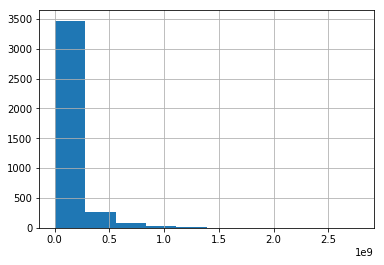

In [14]:
# Draw the histogram of the revenue
df.revenue.hist();

The change of revenue over year and the distribution of revenue are shown below.

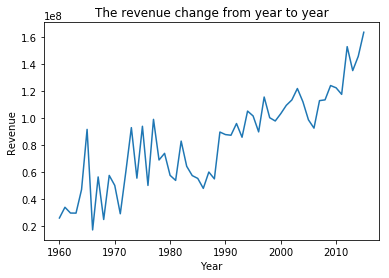

In [15]:
# Draw the line char for the change of the revenue
revenues = df.groupby('release_year')['revenue'].mean()

plt.plot(revenues)
plt.title('The revenue change from year to year')
plt.xlabel('Year')
plt.ylabel('Revenue')

plt.show()

From the line chart above, the revenue changed drastically over the year, especially during the period of 1960s. However, the revenue shows an increasing trend from the overall perspective. Next, we need to compare the revenue in different years. Since there are too many years, we aggregate them into decades.

In [16]:
# Aggregate years into decades
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df['decade'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)
df.head()

,popularity,budget,revenue,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,decade
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,2010s
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,2010s
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,2010s
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,2010s
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,2010s


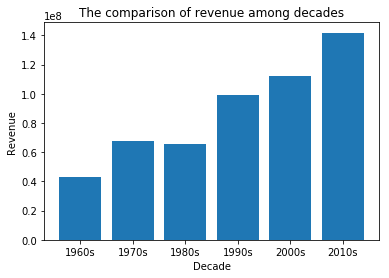

In [17]:
# Draw the bar chart to compare the revenue in differet decades
rev_dis = df.groupby('decade').revenue.mean()

plt.bar(rev_dis.index, rev_dis.values)
plt.title('The comparison of revenue among decades')
plt.xlabel('Decade')
plt.ylabel('Revenue')

plt.show()

From the bar char above, the revenue increased over the year. The 2010s accounts for the most, while the 1960s accounts for the least. 

Next, we need to find the pattern of the high revenue. To order to discover the pattern of the group of high revenues, it is defined that the high revenue is the revenue above the 75% percentile.

In [18]:
# Extract the high revenue dataframe
high_revenue = df.revenue.quantile(.75)
high_rev_df = df[df.revenue > high_revenue]
high_rev_df.revenue.describe()

count    9.640000e+02
mean     3.197611e+08
std      2.473609e+08
min      1.242721e+08
25%      1.653347e+08
50%      2.321503e+08
75%      3.682613e+08
max      2.781506e+09
Name: revenue, dtype: float64

Now, we need to discover the correlation between different variables. In this question, three variables will be selected:'popularity', 'vote_average', and 'budget'. The scatterplot and correlation calculation will be used to analyze these correlations. The first group to discover is the correlation of 'popularity' and 'revenue'.

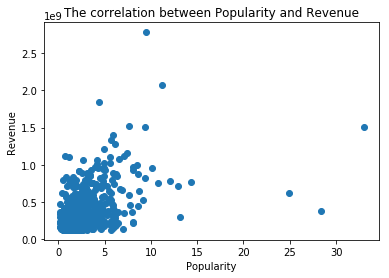

In [19]:
# Draw the scatterplot of the popularity and revenue
plt.scatter(x=high_rev_df.popularity, y=high_rev_df.revenue)
plt.title('The correlation between Popularity and Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')

plt.show()

In [20]:
# Calculate the correlation between 'popularity' and 'revenue'
high_rev_df[['popularity', 'revenue']].corr()

,popularity,revenue
popularity,1.000000,0.511673
revenue,0.511673,1.000000


The correlation between these two variables is 0.51, a relatively high figure. Then, the relationship of 'revenue' and 'vote_average' will be discovered.

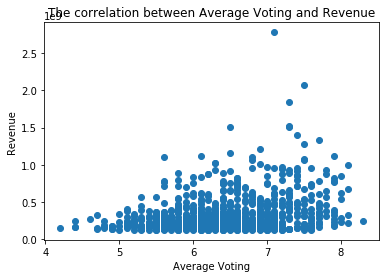

In [21]:
# Draw the scatterplot of the vote_average and revenue
plt.scatter(x=high_rev_df.vote_average, y=high_rev_df.revenue)
plt.title('The correlation between Average Voting and Revenue')
plt.xlabel('Average Voting')
plt.ylabel('Revenue')

plt.show()

In [22]:
# Calculate the correlation between 'vote_average' and 'revenue'
high_rev_df[['vote_average', 'revenue']].corr()

,vote_average,revenue
vote_average,1.000000,0.297338
revenue,0.297338,1.000000


It shows that the correlation between 'vote_average' and 'revenue' is 0.30. The correlation is relatively low. The third group is 'budget' and 'revenue'.

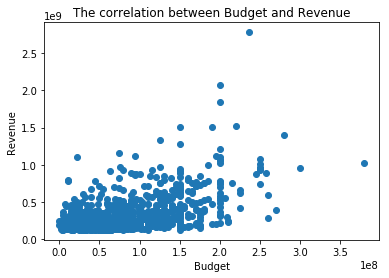

In [23]:
# Draw the scatterplot of the budget and revenue
plt.scatter(x=high_rev_df.budget, y=high_rev_df.revenue)
plt.title('The correlation between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

plt.show()

In [24]:
# Calculate the correlation between 'vote_average' and 'revenue'
high_rev_df[['budget', 'revenue']].corr()

,budget,revenue
budget,1.00000,0.55703
revenue,0.55703,1.00000


The correlation of 0.56 is relatively high for these two variables.

Overall, for the high revenue group, the revenue is related to the 'popularity' and 'budget', and less related to 'vote_average'.

### Research Question 2: Which genres are most popular from year to year?

In order to answer the question, the first thing we need to do is to calculate the most popular one in each year. First, we need to extract the relevant data points according to this question.

In [25]:
df_genres = df[['release_year', 'genres', 'popularity']]
df_genres.head()

,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,Adventure|Science Fiction|Thriller,13.112507
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
4,2015,Action|Crime|Thriller,9.335014


Then, we need to split the row with more than one genre into different rows. The code below is sourced from https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe.

In [26]:
# Split the row with more than one genre into different rows

from itertools import chain

# Return list from series of '|'-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

# Calculate lengths of splits
lens = df_genres['genres'].str.split('|').map(len)

# Create new dataframe, repeating or chaining as appropriate
df_genres = pd.DataFrame({'release_year': np.repeat(df_genres['release_year'], lens),                       
                          'genres': chainer(df_genres['genres']),
                          'popularity': np.repeat(df_genres['popularity'], lens)})

df_genres.head()

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


After splitting, we need to select the most popular genres for each year. The code below is sourced from https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group.

In [27]:
# A function is defined for the selection
def func(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

#Calculate the mean popularity for each genre in each year
df_pop = df_genres.groupby(['release_year', 'genres'], as_index=False).mean()

# Select the most popular genre for each year
df_most_pop = df_pop.groupby('release_year', as_index=False).apply(func).reset_index(drop=True)
df_most_pop.head()

,release_year,genres,popularity
0,1960,Horror,2.610362
1,1960,Thriller,2.610362
2,1961,Animation,2.631987
3,1962,Thriller,3.170651
4,1963,Adventure,1.586280


Then, a scatterplot is drawn to show the change of the most popular genre over the year.

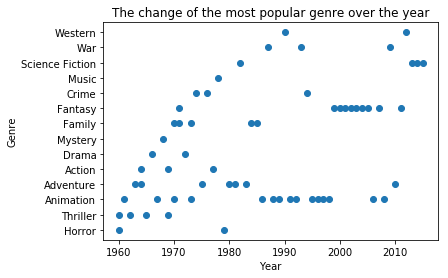

In [28]:
# Draw the scatterplot to show the change of the most popular genre
plt.scatter(df_most_pop.release_year, df_most_pop.genres)
plt.title('The change of the most popular genre over the year')
plt.xlabel('Year')
plt.ylabel('Genre')

plt.show()

From the scatterplot above, it is easy to show that the most popular genre changed over the year. However, in some periods there are no or little changes. Overall, the most popular genre in 1990s is animation, while it becomes fantasy in 2000s.

Next, in order to show the percentage of each genre, a pie chart is drawn sourced from https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py.

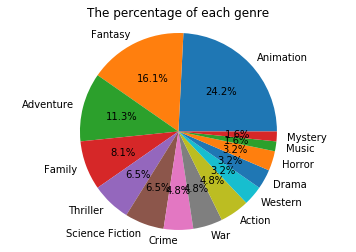

In [29]:
# Draw the pie chart of genres
sizes = df_most_pop.genres.value_counts().values
labels = df_most_pop.genres.value_counts().index

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('The percentage of each genre')

plt.show()

From the pie chart, the 'Animation', 'Adventure', and 'Fantasy' account for a majority of percentage over the year, while other genres like 'Thriller' and 'History' are less frequent to become the most popular genre.

<a id='conclusions'></a>
## Conclusions

Based on all of the discovery above, some conclusions are drawn:
- The revenue changed drastically over the year but showed an overall increase. The 1960s accounts for the least, while the 2010s accounts for the most.
- The revenue of high revenue movie shows a strong positive correlation with budget and popularity, and a weak correlation with average voting. 
- The most popular genre of the movie changed over the year, although it shows the stability in some periods. Over the year, animation, fantasy, and adventure account for a large proportion of the most popular genre.

The limitation of this research is that there are so many data that have been cleaned in this report. These datas are seen as anomalies since they contains NaN, duplicates, or 0 in some or all columns. The amount of data changed from 10866 to 3854. The change is huge so that the results may not represent the population.

<a id='reference'></a>
## Reference

1. https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe
2. https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group
3. https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py